<br>
<font size=6>Statistics</font>
<br>
<br>
<i>"Важно не то, насколько редко мы ошибаемся, а какова суммарная погрешность"</i>.<br>
<br>
<b>Стати́стика</b> — отрасль знаний, наука, в которой излагаются общие вопросы сбора, измерения, мониторинга, анализа массовых статистических (количественных или качественных) данных и их сравнение; изучение количественной стороны массовых общественных явлений в числовой форме.<br>
   <ul>
     <li>Рассчитать численность населения - статистика</li>
     <li>Сколько потратить денег на праздники - статистика</li>
     <li>Сколько купить кг шашлыка на вечер - статистика</li>
   </ul>
Если у вас есть данные и вы хотите получить от них пользу - вы статистик:)<br>

<b>Более нормальное описание статистики</b>:

<b>Статистика</b> опирается на математику и приемы, с помощью которых мы проникаем в сущность данных. Она представляет собой богатую и обширную область знаний, для которой больше подошла бы книжная полка или целая комната в библиотеке, а не глава в книге, поэтому наше изложение, конечно же, будет кратким. Тем не менее представленного в этой главе материала вам будет достаточно для 
того, чтобы стать опасным человеком, и пробудить в вас интерес к самостоятельному изучению статистики.<br><br>
   
МАТЕРИАЛЫ ЗАНЯТИЯ:
- курс занятий по статистике на сайте mathprofi: http://mathprofi.ru/matematicheskaya_statistika.html
- Книга "Data Science наука о данных с нуля", Джоэл Грас, 2е издание.<br><br>


<br>
- <b>Качественная, дискретная, или категориальная переменная</b> — переменная, которая может принимать одно из ограниченного и обычно фиксированного числа возможных значений, например, переменная "первый" или "кассир" являются качественными переменными,<br>
- "первый" - означает в наших данных, что человек первый раз берет кредит.<br>
- "кассир" - профессия человека. <br>
Такие данные обычно кодируются числами.<br>
<br>
- <b>Колличественные данные или числовые</b> - данные, которые представлены числами.<br>
- 32000 - зарплата <br>
- 25 - возраст
<br>
<br>

Text(0.5, 1.0, 'Количество приглашений')

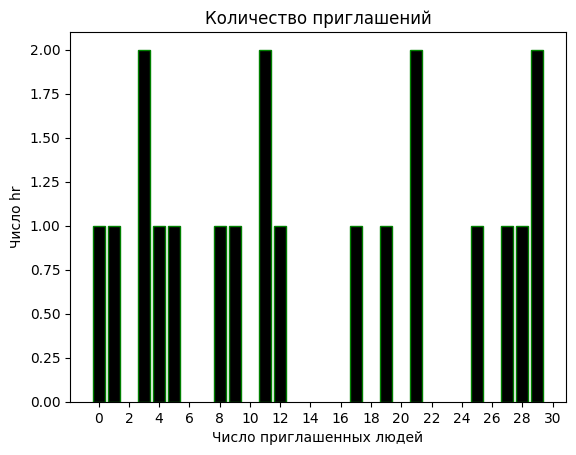

In [1]:
# Сколько hr'ы в нашей компании пригласили людей
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

invite_people = [np.random.randint(0, 30) for i in range(20)] # Создаем список сколько людей пригласил каждый hr

people_counter = Counter(invite_people)
xs = [num_people for num_people in people_counter]
ys = [people_counter[num_people] for num_people in people_counter]
plt.bar(xs, ys, color='black', edgecolor='green')
plt.xticks([2 * i for i in range(16)])
plt.xlabel('Число приглашенных людей')
plt.ylabel('Число hr')
plt.title('Количество приглашений')

<br>
Хорошо, есть диаграмма, которая покажет нам как hr отработали свой день.<br>
Но график нужно либо распечатать, либо таскать за собой ноутбук.<br>
Почему бы нам не собрать некоторую статистику и хвалиться перед всеми числами.
<br>
<br>


1)Самым простым показателем является число точек данных:


In [2]:
num_points = len(invite_people)
print('Кол-во точек: ', num_points) # Интерпретируется, как кол-во hr в нашей команде

Кол-во точек:  20


2) Наибольшие и наименьшие значения:

In [3]:
largest_value = max(invite_people)
smallest_value = min(invite_people)
print('Наибольшее число приглашенных людей: ', largest_value)
print('Наименьшее число приглашенных людей: ', smallest_value)

Наибольшее число приглашенных людей:  29
Наименьшее число приглашенных людей:  0


In [4]:
sorted_values = sorted(list(set(invite_people))) # избавляемся от повторяющихся значений
print(f'Второй минимум: {sorted_values[1]}')
print(f'Второй максимум: {sorted_values[-2]}')

Второй минимум: 1
Второй максимум: 28


<br>
<font size=5>Центральные тенденции</font>
<hr>
Обычно мы хотим иметь некое представление о том, где наши данные центрированы.<br>
Чаще всего для этих целей используется среднее (или среднее арифметическое) <br>
значение, которое берется как сумма данных, деленная на их количество<br><br>

<br>
<font size=4>Среднее число</font>
<br>
<br>

In [5]:
def mean(xs: list[float]) -> float:
    return sum(xs) / len(xs)

print(f'Среднее кол-во приглашенных людей: {mean(invite_people)}')

Среднее кол-во приглашенных людей: 14.15


<br>
<font size=5>Медиана</font>
<hr>
<b>Медиана</b> - ближайшее к центру значение<br>
Медиана в отличе от среднего - не зависит от каждого значения в наборе данных.<br>
Например, если сделать наибольшую точку еще больше(или наименьшую еще меньше), то<br>
срединные точки останутся неизменными, следовательно, и медиана тоже не изменится<br>
<br>
  

In [6]:
def _median_odd(xs: list[float]) -> float: 
    """Если len(xs) является нечетной, 
    то медиана - это срединный элемент""" 
    return sorted(xs) [len(xs) // 2] 

def _median_even(xs: list[float]) -> float: 
    """Если len(xs) является четной, то она является средним значением 
    двух срединных элементов""" 
    sorted_xs = sorted(xs) 
    hi_midpoint = len(xs) // 2 #напр. длина 4 => hi_midpoint 2 
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2 

def median(v: list[float]) -> float: 
    """Отыскивает 'ближайшее к середине' значение v""" 
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5 
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [7]:
median = median(sorted(invite_people))
print(f'Центральное число приглашений: {median}')

Центральное число приглашений: 11.5


<br>
<font size=3><b>Среднее значение</b> вычисляется проще, и оно плавно варьирует по мере изменения данных.<br></font>
Если у нас есть <i>n</i> точек и одна из них увеличилась на любое малое число <i>e</i>, то среднее<br> 
обязательно увеличится на <i>e/n</i>.(Этот факт делает среднее число подверженным разным хитростям при калькуляции).<br><br>
А для того чтобы найти <b>медиану</b>, данные нужно отсортировать, и изменение одной из точек на <br>
любое малое число <i>e</i> может увеличить медиана на величину, равную <i>e</i>, меньшую чем <i>e</i>, либо не изменить совсем.<br>
<br><br>


<font size=3><b>Среднее значение очень чувствительно к <i>выбросам</i>.</b></font>
<br>Если бы один из hr пригласил 100 человек, когда другие не выше 30, то среднее увеличилось бы на 5. <br>
Средний показатель приглашений стал бы больше и мы могли бы сказать начальнику, что рабочий день прошел отлично.<br>
Но посмотрев на данные, мы увидим, что 100 человек - это скорее выброс, чем правда, и вероятно человек схитрил и поставил себе лишних приглашений.<br>
В то время как медиана осталась бы на прежнем уровне.
<br>

<br>
<font size=5>Квантиль</font>
<hr>
<b>Квантиль</b> - значение, которое заданная случайная величина(число, которое мы получаем после эксперимента) не превышает с фиксированной вероятностью.<br>
Если вероятность задана в процентах, то квантиль называется <b>процентилем</b> или <b>перцентилем</b><br>
Например, фраза "90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг" <br>
означает, что 90% мальчиков рождаются с весом, меньшим либо равным 4 кг, <br>
а 10% мальчиков рождаются с весом, большим 4кг.<br><br>

Обобщением <b>медианы</b> является <b><i>квантиль</i></b>, который представляет значение, ниже<br>
которого располагается определенный процентиль данных.(медиана представляет значение, ниже которого расположены 50% данных)
<br>

In [8]:
def quantile(x: list[float], p: float) -> float:
    """Возвращает значение p-го процентиля в x"""
    p_index = int(p * len(x)) # Преобразает % в индекс списка
    return sorted(x)[p_index-1]

print(quantile(invite_people, 0.10))
print(quantile(invite_people, 0.25), 'Нижний квантиль')
print(quantile(invite_people, 0.75), 'Верхний квантиль')
print(quantile(invite_people, 0.90))

1
4 Нижний квантиль
21 Верхний квантиль
28


<br>
<font size=5>Мода</font>
<hr>
<b>Мода</b> - значение или значения, которые встречаются наиболее часто
<br><br>

In [9]:
def mode(x: list[float]) -> list[float]:
    """Возвращает список, т. к. может быть более одной моды"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
    
mode(invite_people)

[3, 21, 11, 29]

<br>
<font size=6>Вариация</font>
<hr>
<b>Вариация</b> служит мерой разброса наших данных. Как правило, это статистические показатели,<br>
у которых значения, близкие к нулю, означают полное отсутствие разброса, а большие значения - большой разброс.<br><br>


<br>
<font size=5>Размах(range)</font>
<hr>
<b>Размах</b> является самым простым показателем вариации. Определяется как разница между max и min значениями данных:<br><br>
$$R = X_{max} - X_{min}$$
<br>
Как и медиана, размах не особо зависит от всего набора данных.
<br>
<br>

In [10]:
def data_range(x: list[float]) -> float:
    return max(x) - min(x)

print(data_range(invite_people), '- Разница между максимальным и минимальным кол-во приглашений')

29 - Разница между максимальным и минимальным кол-во приглашений


<br>
Более точным показателем вариации является <b><i>дисперсия.</b></i><br>
<br>

<br>
<font size=5>Дисперсия(variance)</font>
<hr>
<b>Дисперсия случайной величины</b> - мера разброса значений случайной величины относительно её математического ожидания(среднее значение случайной величины):<br><br>
$$σ^2 = 1/n\sum\limits_{i=1}^n(X_{i} - <X>)^2$$
<br>
$$Где\ X_i - случайная\ величина,\ <X> - среднее\ значение$$
$$Иногда\ 1/n\ записывают,\ как\ (n-1)$$
<br>
Использование <i>$n-1$</i> вместо <i>$n$</i> известно как поправка <a href="https://en.wikipedia.org/wiki/Bessel%27s_correction">Бесселя.</a><br>
Когда имеют дело с выборкой из более крупной популяции(генеральной совокупности), переменная $<X>$ является лишь <b><i>приближенной оценкой среднего</i></b>, где<br>
<i>$(X_i - <X>)^2$</i> в среднем дает заниженную оценку квадрата отклонения от среднего для <i>$X_i$</i>. Поэтому делят не на <i>$n$</i>, а на <i>$(n - 1)$</i>.<br>
На практике при $n > 30$ уже нет разницы, какое число стоит в знаменателе: <i>$n$</i> или <i>$n-1$</i>.
<br><br>

In [11]:
def de_mean(xs: list[float]) -> list[float]:
    """К каждому элементу списка xs применить вычитание среднего"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: list[float]) -> float:
    """Дисперсия"""
    assert len(xs) >= 2, 'Дисперсия требует наличия не менее двух элементов'
    n = len(xs)
    deviations = de_mean(xs)
    return sum([deviation**2 for deviation in deviations]) / (n - 1)

In [12]:
variance(invite_people)

102.02894736842106

<br>
<b>Проблема дисперсии</b> в том, что она измеряется в единицах, которые представляют собой <i>квадрат</i> исходных единиц ("кандидаты в квадрате")<br>
Поскольку такие единицы измерения трудно интерпретировать, то вместо дисперсии мы будем чаще использовать "<b><i>Среднеквадратическое отклонение</i></b>".
<br>
<br>

<br>
<font size=5>Среднеквадратическое отклонение</font>
<hr>
<b>Среднеквадратическое отклонение</b> - наиболее распространенный показатель рассеивания значений случайной величины<br>
относительно её математического ожидания(аналог среднего арифметического с бесконечным числом исходов).<br><br>
$$σ = \sqrt{1/n\sum\limits_{i=1}^n(X_{i} - <X>)^2}$$
<br>
Встречаются также синонимы словосочетания <b>Среднеквадратическое отклонение</b>:<br>
<ul>
    <li><b>среднееквадратичное отклонение;</li>
    <li><b>квадратичное отклонение;</li>
    <li><b>стандартное отклонение;</li>
    <li><b>стандартный разброс;</li> 
    <li><b>стандартная неопределенность.</li>
</ul>
<br>
<font size=4><b>Интерпретация величины среднеквадратического отклонения.</b><br></font>
Если <b>стандартное отклонение</b> в результате дает <b>большее значение</b>, то оно показывает, что и <b>разброс больший;</b><br>
<b>меньшее значение</b>, соответственно, показывает, что значения в списке сгруппированы вокруг среднего значения, то есть, <b>разброс меньший</b>.<br><br>


Например, если у нас есть три списка [0, 0, 14, 14], [0. 6, 8, 14] и [6, 6, 8, 8].<br>
У все трех списков средние значения - 7, а среднееквадратичное отклонение, соответственно, равны 7, 5, и 1. <br>
У последнего списка среднеквадратичное отклонение маленькое, так как значения сгруппированы вокруг среднего значения,<br>
следовательно у такого списка меньший разброс. <br>
У первого списка самый большой показатель среднеквадратичного отклонения, следовательно, значения<br>
внутри списка сильно расходятся со средним значением, а это значит, больший разброс.
<br>


In [13]:
import math

def standard_deviation(xs: list[float]) -> float:
    """Стандартное отклонение - корень из дисперсии"""
    return math.sqrt(variance(xs))

standard_deviation(invite_people)

10.100937944984171

<br>
Размах и стандартное отклонение имеют ту же проблему с выбросами, что и среднее,<br>
ведь по сути страндартное отклонение показывает <b>СРЕДНИЙ</b> показатель отклонения(насколько в среднем числа отклоняются от среднего).<br>
Если бы у одного из наших hr'ов приглашений было бы 100, то ,конечно, стандартное отклонение увеличилось бы.<br>
И из-за этого мы бы сделали неверные выводы по поводу наших hr'ов.<br><br>
Более надежной альтернативой является <b>интерквартильный размах</b>.<br>
Разность между значением, соответствующим 75% данных, и значением, соответствующим 25% данных:
<br>
<br>

In [14]:
def interquartile_range(xs: list[float]) -> float:
    """Возвращает разницу между 75%-ным и 25%-ным квартилями"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(invite_people)

17

<br>
Мы уже рассмотрели несколько понятий для описания наших данных, но мы все равно не получили всех ответов.<br>
Что нам делать, если мы зададимся такими вопросами?
<ul>
<li>Как получить зависимость одной велечины от другой? <br></li>
<li>Если ли связи между ними и если есть, то какая она?<br></li>
<li>Как 0.5 литров пива влияют на настроение человека?<br></li>
<li>Эта связь сильная или слабая, она больше, чем связь между хорошим климатом в городе и числом проданных пуховиков.<br></li>
</ul>
<br>
Как насчет рассчитать зависимость между работай наших hr'ов?<br>
Их работа оценивается в количестве приглашенных людей и временем проведенным за рабочим местом.
<br><br>

In [16]:
invite_people = [2, 27, 15,  2, 17, 28, 24,  3, 18, 25,  8, 16, 26,  5, 19, 14, 18, 21, 21, 23] # сколько каждый hr пригласил людей: первый - 2 человека, второй - 27 человек и тд. 
work_time = [3, 8, 5, 1, 4, 7, 7, 2, 5, 6, 4, 5, 6, 3, 5, 4, 5, 5, 4, 5] # сколько часов каждый hr работал: первый - 3 часа, второй - 8 часов и тд. 

<br>
<font size=5>Ковариация</font>
<hr>
<b>Ковариация<i>(covariance)</i></b> - парный аналог дисперсии.<br>
В отличие от дисперсии, которая измеряет отклонение одной-единственной переменной от ее среднего, <b>ковариация</b> измеряет <b>отклонение двух переменных</b> в тандеме от своих средних.<br>
<br><br>
$$cov(X, Y) = 1/n\sum\limits_{i=1}^n(X_{i}Y_{i} - <X><Y>),$$<br><br>
$$где$$
$$<X> = 1/n\sum\limits_{i=1}^n(X_{i})\\ <Y> = 1/n\sum\limits_{i=1}^n(Y_{i})$$<br>
<font size=3><b>Свойства:</b></font>
<ul>
    <li>Если <i>X,Y</i> - <b>независимые</b> случайные величины, то <br>
        <p>&nbsp;&nbsp;&nbsp;&nbsp;$cov(X, Y) = 0$</p></li>
    <li>Ковариация случайной величины с собой равна дисперсии:
        <p>&nbsp;&nbsp;&nbsp;&nbsp;$cov(X, X) = D[X]$</p></li>
    <li>Ковариация симметрична:
        <p>&nbsp;&nbsp;&nbsp;&nbsp;$cov(X, Y) = cov(Y, X)$</p></li></ul><br>
    
<font size=3><b>Интерпретация:</b></font><br>
<p>&nbsp;&nbsp;&nbsp;&nbsp;Если <b>ковариация положительна</b>, то с ростом значений одной случайной величины, значения второй имеют тенденцию <b>возрастать</b>,<br>
&nbsp;&nbsp;&nbsp;&nbsp;если знак <b>отрицательный</b>, то убывать. <b>"Большая" положительная ковариация</b> означает, что X стремится принимать большие значения<br>
&nbsp;&nbsp;&nbsp;&nbsp;при больших значениях Y и малые значения - при малых Y. <b>"Большая" отрицательная ковариация</b> означает обратное - X стремится принимать<br>
    &nbsp;&nbsp;&nbsp;&nbsp;малые значения при большом Y, и наоборот. <b>Ковариация</b>, <i>близкая к нулю</i>, означает, что такой <b>связи не существует.</b></p>
    
Но при этом все равно возникает проблема с интерпретацией результата.
<ul>
    <li>Единицами измерения ковариации являются произведения единиц входящих пременных(например, число приглашенных людей и часы в день),<br> 
        что такое "люди в час в день"?</li>
    <li>Если бы у каждого hr было в 2 раза больше приглашений(но такое же количество отработанных часов), то ковариация была бы в 2 раза больше.<br>
    Однако в некотором смысле степень взаимосвязи между ними осталась бы на прежнем уровне. Другими словами, трудно понять, что считать "большой" ковариацией.</ul>
<br>
<br>

Для вычисления ковариации нам потребуется функция <b>dot</b> из занятия по линейной алгебре:

In [17]:
def dot(v: list[float], w: list[float]) -> float:
    """Вычисление (v_i * w_i) + ... + (v_n + w_n)"""
    assert len(v) == len(w), 'Вектора должны иметь одинаковую длину'
    return sum([v_i * w_i for v_i, w_i in zip(v, w)])

In [18]:
def covariance(xs: list[float], ys: list[float]) -> float:
    """Вычисление ковариации"""
    assert len(xs) == len(ys), 'Вектора должны иметь одинаковое количество элементов'
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

print(f'Ковариация: {covariance(invite_people, work_time)}')

Ковариация: 12.873684210526312


<br>
Вспомните, что функция dot суммирует произведения соответствующих элементов векторов.<br>
Когда элементы обоих векторов x и y одновременно выше или ниже своих средних, например, $X_i$ стремится(->) к уменьшению и $Y_i$ тоже -> к уменьшению, то в сумму входит положительное число.<br> 
Когда один из элементов находится выше своего среднего, а другой - ниже, например, $X_i$ -> к увеличению, а $Y_i$ -> к уменьшению, то в сумму входит отрицательное число:<br>
Если $X_i = 5$, а $Y_i = -2$, то их произведение $-10$, следовательно связь обратнопропорциональна.<br><br>

<br>
Ковариация получилась положительной, следовательно, чем больше X, тем больше Y или чем меньше X, тем меньше Y.<br>
Но что значит 12? Вроде, не близко к нулю, значит связь и правда есть, но насколько она сильная сложно сказать.<br>
Нам нужен показатель, у которого будет придел и, дойдя до него, мы поймем, что связь максимально сильная.
<br>
<br>

<br>
<font size=5>Корреляция</font>
<hr>
<b>Корреля́ция</b> (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми), при этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.<br><br>
Впервые в научный оборот термин корреляция ввёл французский палеонтолог Жорж Кювье в XVIII веке. Он разработал «закон корреляции» частей и органов живых существ, с помощью которого можно восстановить облик ископаемого животного, имея в распоряжении лишь часть его останков.<br><br>

<b>Корреляции полезны</b>, потому что они могут указывать на <b>прогностическую взаимосвязь</b>, которую можно использовать на практике. Например, электроэнергетическая компания может вырабатывать меньше энергии в теплый день на основе корреляции между спросом на электроэнергию и погодой. В этом примере существует причинно-следственная связь, поскольку экстремальные погодные условия заставляют людей использовать больше электроэнергии для обогрева или охлаждения. Однако, в целом, наличие корреляции недостаточно для вывода о наличии причинно-следственной связи (т.е. корреляция не подразумевает причинно-следственную связь).<br><br>

Значительная <b>корреляция</b> между двумя случайными величинами всегда является свидетельством <b>существования некоторой статистической связи</b> в данной выборке, но эта связь не обязательно должна наблюдаться для другой выборки и иметь причинно-следственный характер. Часто заманчивая простота корреляционного исследования подталкивает исследователя делать ложные интуитивные выводы о наличии причинно-следственной связи между парами признаков, в то время как коэффициенты корреляции устанавливают лишь статистические взаимосвязи. Например, рассматривая пожары в конкретном городе, можно выявить весьма высокую корреляцию между ущербом, который нанёс пожар, и количеством пожарных, участвовавших в ликвидации пожара, причём эта корреляция будет положительной. Из этого, однако, не следует вывод «увеличение количества пожарных приводит к увеличению причинённого ущерба», и тем более не будет успешной попытка минимизировать ущерб от пожаров путём ликвидации пожарных бригад. Корреляция двух величин может свидетельствовать о существовании общей причины, хотя сами явления напрямую не взаимодействуют. Например, обледенение становится причиной как роста травматизма из-за падений, так и увеличения аварийности среди автотранспорта. В этом случае две величины (травматизм из-за падений пешеходов и аварийность автотранспорта) будут коррелировать, хотя они не связаны причинно-следственно друг с другом, а лишь имеют стороннюю общую причину — гололедицу.<br><br>

В то же время, <b>отсутствие корреляции</b> между двумя величинами ещё не значит, что между ними нет никакой связи. Например, зависимость может иметь сложный нелинейный характер, который корреляция не выявляет.
<br><br>
Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными. В первом случае предполагается, что мы можем определить только наличие или отсутствие связи, а во втором — также и её направление. <b><i>Отрицательная корреляция</i></b> — корреляция, при которой увеличение одной переменной связано с уменьшением другой. При этом коэффициент корреляции будет отрицательным. <b><i>Положительная корреляция</i></b> в таких условиях — это такая связь, при которой увеличение одной переменной связано с увеличением другой переменной. Возможна также ситуация отсутствия статистической взаимосвязи — например, для независимых случайных величин.<br><br>

По сути, <b>корреляция</b> - это мера того, как две или более переменных связаны друг с другом. Существует несколько <b>коэффициентов корреляции</b>, которые измеряют степень <i>корреляции</i>. Наиболее распространенным из них явялется <b><i>коэффициент корреляции Пирсона</i></b>. Этот коэффициент получается путем взятия отношения ковариации двух рассматриваемых переменных нашего числового набора данных,
нормализованного(что такое нормализация можно прочитать <a href='https://www.bigdataschool.ru/blog/%d0%bd%d0%be%d1%80%d0%bc%d0%b0%d0%bb%d0%b8%d0%b7%d0%b0%d1%86%d0%b8%d1%8f-%d0%bc%d0%b5%d1%82%d0%be%d0%b4%d1%8b-%d1%81%d1%80%d0%b5%d0%b4%d1%81%d1%82%d0%b2%d0%b0-data-preparation.html'>здесь</a>) к квадратному корню из дисперсии(стандартное отклонение). Математически ковариацию двух переменных просто делят на произведение их стандартных отклонений.<br><br>
 
$$corr(X, Y) = cov(X, Y)/(σ_x*σ_y)$$<br><br>


In [21]:
def correlation(xs: list[float], ys: list[float]) -> float:
    """Измеряет связь между xs-выборкой и ys-выборкой
       Коэффициент корреляции находится в диапазоне [-1;1]"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0 # если вариации нет, то корреляция равна

print(f'Корреляция: {correlation(invite_people, work_time)}')

Корреляция: 0.897366311760987


<br>
Корреляция является безрамерной величиной, её значения всегда лежат между -1(идеальная антикорреляция) и 1(идеальная корреляция).<br>
Значение 0.89 является высокой корреляцией.<br><br>

Мы забыли проверить наши данные перед тем, как получать статистические показатели.<br><br>


Text(0, 0.5, 'Время работы')

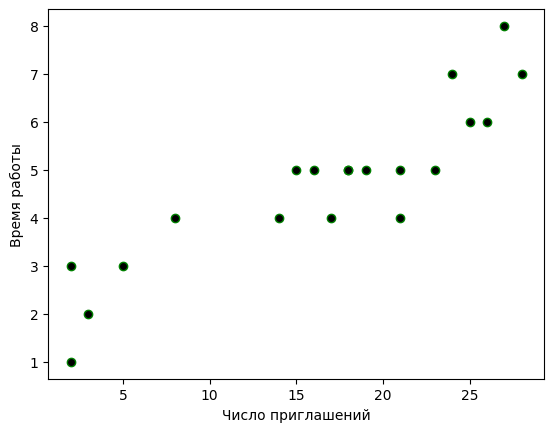

In [29]:
plt.scatter(invite_people, work_time, color='black', edgecolor='green')
plt.xlabel('Число приглашений')
plt.ylabel('Время работы')

<br>
С нашими данными на первый взгляд все хорошо, больше приглашений набирает тот, кто больше работает, выбросов нет.<br>
Попробуем немного изменить наши данные, добавим в них выброс и посмотрим как изменится корреляция.<br>
<br>


In [41]:
invite_people = [2, 27, 15,  2, 17, 28, 24,  3, 18, 25,  8, 16, 26,  5, 19, 14, 18, 21, 21, 100] # Последний hr пригласил 100 человек 
work_time = [3, 8, 5, 1, 4, 7, 7, 2, 5, 6, 4, 5, 6, 3, 5, 4, 5, 5, 4, 1] # последний hr отработал всего 1 час

Text(0, 0.5, 'Время работы')

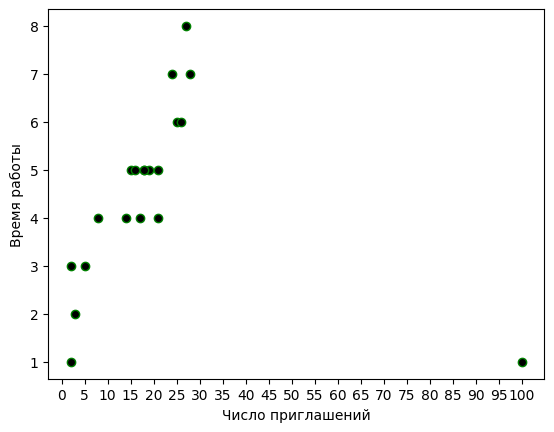

In [42]:
plt.scatter(invite_people, work_time, color='black', edgecolor='green')
plt.xticks([5 * i for i in range(21)])
plt.xlabel('Число приглашений')
plt.ylabel('Время работы')

In [46]:
print(f'Корреляция: {correlation(invite_people, work_time)}')

Корреляция: -0.06902543070514797


Корреляция значительно поменялась.

<br>
<font size=5>Парадокс симпсона</font>
<hr>
Прочитать подробно <a href='https://ru.m.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%A1%D0%B8%D0%BC%D0%BF%D1%81%D0%BE%D0%BD%D0%B0'>парадокс симпсона</a><br><br>
<b>Парадокс Симпсона (также Парадокс Юла — Симпсона или парадокс объединения)</b>  — эффект, явление в статистике, когда при наличии двух групп данных, в каждой из которых наблюдается одинаково направленная зависимость, при объединении этих групп направление зависимости меняется на противоположное.<br><br>

<font size=4><b>Причины</b></font><br>
<i>Причина парадокса</i> заключается в некорректном усреднении двух групп данных с различной долей контрольных наблюдений (нерепрезентативная выборка).<br>
Поскольку интуитивно предполагается, что при применении найденных зависимостей доля контрольных будет одинаковой в обеих группах, но если в исходных данных это не выполняется,<br>
то к ним нельзя применять арифметическое усреднение.<br><br>

<font size=4><b>Практическая значимость</b></font><br>
Парадокс Симпсона иллюстрирует неправомерность обобщений по нерепрезентативным выборкам, иногда опасных для жизни. Так, например, в ходе эксперимента в группе мужчин и группе женщин, больных одной и той же болезнью, к стандартному лечению прибавили новый лекарственный препарат. Результат по обеим группам в отдельности подтверждал эффективность нового средства.<br><br>

<img src='data/man_woman.jpg'></img><br><br>
Интуитивно предполагается, что если в обеих группах прослеживается зависимость, она должна проявиться и при объединении этих групп. Но хотя соотношение выздоровевших и больных среди и женщин, и мужчин, принимавших лекарство, больше, чем среди тех из них, кто его не использовал, в связи с нерепрезентативностью контрольной группы в агрегированных данных эта закономерность не сохраняется.<br><br>
<img src='data/mw.jpg'></img><br><br>
Соотношение в агрегированных данных 850/870<480/410, то есть 0,977<1,171. Следовательно, доля выздоровевших среди принимавших лекарство меньше той же доли среди не принимавших.<br>

Для устранения парадокса нужно обратить внимание, что отношение контрольной группы к группе воздействия в приведённых группах резко различается: у мужчин составляет (80+130)/(700+800) = 14 %, а у женщин (400+280)/(150+70) = 309 %.<br>

Для корректного усреднения нужно обеспечить репрезентативность контрольной группы в обеих выборках, введя весовые коэффициенты так, чтобы взвешенная доля контрольных в обеих группах стала одинаковой. В данном случае достаточно количество мужчин, не принимавших лекарства, умножить на весовой коэффициент 22.07. Измененные таблицы будут выглядеть так:<br><br>
<img src='data/mwf.jpg'></img><br><br>

<br>
<font size=5>Корреляционные ловушки</font>
<hr>
Корреляция, равная нулю, означает отсутствие линейной связи между двумя переменными. Однако могут быть совсем другие виды зависимостей. <br>
Например, если: <br>
х = [-2, -1, о, 1, 2] <br>
у = [ 2, 1, о, 1, 2] <br>
то переменные х и у имеют нулевую корреляцию, но связь между ними определенно существует - каждый элемент у равен абсолютному значению соответствующего элемента х.<br> 
Но в них отсутствует связь, при которой знание о том, как х _ i соотносится со средним mean (х), дает нам информацию о том, как у_ i соотносится со средним mean (у). <br>
Это как раз тот тип связи, который корреляция пытается найти. <br><br>
Кроме того, корреляция ничего не говорит о величине связи. Переменные: <br>
х = [-2, 1, о, 1, 2] <br>
у= [99.98, 99.99, 100, 100.01, 100.02] <br>
имеют очень хорошую корреляцию, но в зависимости от того, что вы измеряете, вполне возможно, что эта связь не представляет какого-то интереса.<br><br>